In [329]:
import matplotlib.pyplot as plt
from scipy.constants import c, h, k
import numpy as np
import pandas as pd

![form](form.png)

In [330]:
RE         = 1
RL         = 1
#dist to star from earth and distance of star to planet respectively (need to find these)
#will need to be arrays obviously
lam1       = 532e-9
lam2       = 673e-9
#define wavelengths of bands used
x1         = h*c/(k*lam1)
x2         = h*c/(k*lam2)
#calculates x defined in the paper
n          = 4 #defined by paper
DistMult   = (RE/RL)**2
#accounts for chagning brightness of star due to location of planet
II         = []
T          = []
#used to help calculate temperature based of above formula
wein       = []
#finds peak wavelength to show color of star (based off wein's law)
brightness = []
gamma      = 5 - 9*(np.abs(np.log(x1/x2)) + 3)**(-.252)
#based off formula

In [331]:
data = np.array(pd.read_csv("Gaia.csv"))
#brings in data
BPG  = data[:,64]
#grabs the BP-G color thing
flux = data[:,52]
#brings in flux of bp because that is the center of the spectrum
#this way it does the brightness in the most efficient way 
fm   = np.nanmax(flux)
#finds the maximum flux in order to normalize the flux

In [332]:
for i in range(len(BPG)):
    II.append(np.exp(-BPG[i]/2.5))
    T.append(((x2-x1)/2) * (1/(np.log(II[i]*(x2/x1)**(n-1))) + 1/(np.log(II[i]*(x2/x1)**(n-gamma)))) )
    T[i] = T[i] +T[i]*.1
    #fixes for an error discussed in the paper where the error was 10% 
    #i dont really understand why itworks but it gives the right temperature that was observed
    #I checked a lot of them
    brightness.append(flux[i]/fm*DistMult)
    wein.append(2.989e-3/T[i]*1e9)

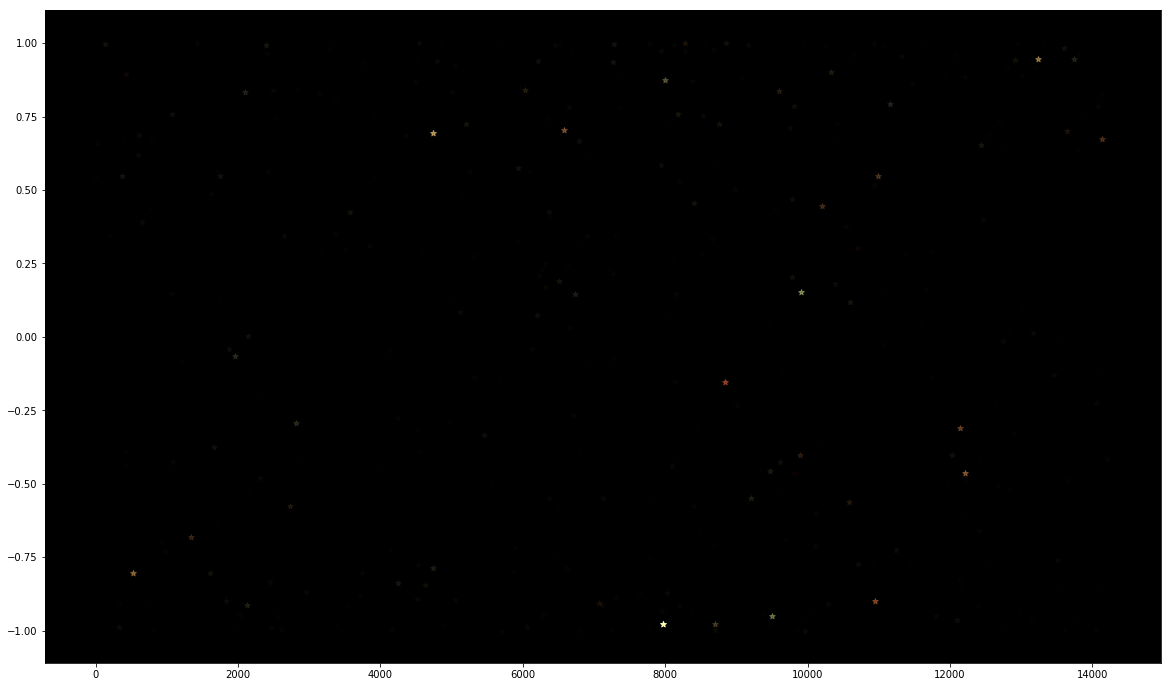

In [341]:
cm = plt.cm.get_cmap("Spectral")
x = []
y =[]
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.set_facecolor('xkcd:black')
for i in range(14209):
    y.append(np.cos(i))
    x.append(i)
    plt.scatter([x[i]],[y[i]], marker= '*',c=[wein[i]],vmin=380,vmax=740, cmap=cm, alpha = brightness[i]);